In [1]:
!pip install nc-time-axis

In [3]:
%matplotlib inline

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import nc_time_axis

import intake

# util.py is in the local directory
# it contains code that is common across project notebooks
# or routines that are too extensive and might otherwise clutter
# the notebook design
import util 

/srv/conda/envs/notebook/lib/python3.7/site-packages/intake/source/discovery.py:136: FutureWarning: The drivers ['stac-catalog', 'stac-collection', 'stac-item'] do not specify entry_points and were only discovered via a package scan. This may break in a future release of intake. The packages should be updated.
  FutureWarning)


In [4]:
if util.is_ncar_host():
    col = intake.open_esm_datastore("../catalogs/glade-cmip6.json")
else:
    col = intake.open_esm_datastore("../catalogs/pangeo-cmip6.json")
col

pangeo-cmip6-ESM Collection with 28660 entries:
	> 10 activity_id(s)

	> 23 institution_id(s)

	> 48 source_id(s)

	> 29 experiment_id(s)

	> 86 member_id(s)

	> 23 table_id(s)

	> 190 variable_id(s)

	> 7 grid_label(s)

	> 28660 zstore(s)

	> 59 dcpp_init_year(s)

In [5]:
col.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
0,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,pr,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
1,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,prsn,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
2,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tas,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
3,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tasmax,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
4,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tasmin,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN


In [6]:
col.df.columns

Index(['activity_id', 'institution_id', 'source_id', 'experiment_id',
       'member_id', 'table_id', 'variable_id', 'grid_label', 'zstore',
       'dcpp_init_year'],
      dtype='object')

In [7]:
import pprint 
uni_dict = col.unique(['source_id', 'experiment_id', 'table_id'])
pprint.pprint(uni_dict, compact=True)

{'experiment_id': {'count': 29,
                   'values': ['ssp370', 'esm-ssp585', '1pctCO2-bgc', 'hist-bgc',
                              '1pctCO2', 'abrupt-4xCO2', 'historical',
                              'piControl', 'amip', 'esm-hist', 'esm-piControl',
                              'hist-GHG', 'hist-aer', 'hist-nat', 'dcppA-assim',
                              'dcppA-hindcast', 'dcppC-hindcast-noAgung',
                              'dcppC-hindcast-noElChichon',
                              'dcppC-hindcast-noPinatubo', 'highresSST-present',
                              'control-1950', 'hist-1950', 'deforest-globe',
                              'esm-ssp585-ssp126Lu', 'omip1', 'lgm', 'ssp126',
                              'ssp245', 'ssp585']},
 'source_id': {'count': 48,
               'values': ['BCC-ESM1', 'BCC-CSM2-MR', 'CanESM5', 'CNRM-ESM2-1',
                          'UKESM1-0-LL', 'GISS-E2-1-G', 'CESM2', 'GFDL-ESM4',
                          'AWI-CM-1-1-MR', 'CAM

In [8]:
print(col.unique(['variable_id']))

{'variable_id': {'count': 190, 'values': ['pr', 'prsn', 'tas', 'tasmax', 'tasmin', 'ts', 'ua', 'va', 'cLeaf', 'cVeg', 'gpp', 'lai', 'npp', 'ra', 'tran', 'chl', 'detoc', 'diftrblo', 'difvho', 'difvso', 'dissic', 'dissicabio', 'dissicnat', 'fgco2', 'fgco2abio', 'fgco2nat', 'no3', 'o2', 'phyc', 'phyn', 'pon', 'talk', 'zooc', 'nbp', 'fgo2', 'hfds', 'sos', 'tos', 'calc', 'dfe', 'dissoc', 'expc', 'expn', 'expp', 'expsi', 'graz', 'nh4', 'ph', 'phydiat', 'phydiaz', 'phypico', 'pnitrate', 'po4', 'pp', 'remoc', 'si', 'hus', 'psl', 'ta', 'zg', 'mlotst', 'so', 'tauuo', 'tauvo', 'thetao', 'thetaoga', 'uo', 'vo', 'volo', 'wo', 'zos', 'sithick', 'huss', 'rlds', 'rlus', 'hfls', 'uas', 'vas', 'ps', 'ch4', 'clt', 'co2', 'evspsbl', 'hfss', 'hurs', 'o3', 'prw', 'rlut', 'rlutcs', 'rsds', 'rsdt', 'rsus', 'rsut', 'rsutcs', 'tauu', 'tauv', 'snc', 'snw', 'cLitterAbove', 'cLitterBelow', 'cRoot', 'cSoilFast', 'cSoilMedium', 'cSoilSlow', 'mrro', 'mrros', 'mrso', 'mrsos', 'rh', 'tsl', 'masscello', 'masso', 'thkcel

In [9]:
variable='dissic'

In [10]:
cat = col.search(experiment_id=['historical'], table_id='Oyr', variable_id=variable, grid_label='gn')
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
1475,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN
1544,CMIP,CCCma,CanESM5,historical,r10i1p2f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN
1614,CMIP,CCCma,CanESM5,historical,r11i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r11i1...,NaN
1710,CMIP,CCCma,CanESM5,historical,r12i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r12i1...,NaN
1806,CMIP,CCCma,CanESM5,historical,r13i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r13i1...,NaN
1903,CMIP,CCCma,CanESM5,historical,r14i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r14i1...,NaN
1999,CMIP,CCCma,CanESM5,historical,r15i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r15i1...,NaN
2095,CMIP,CCCma,CanESM5,historical,r16i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r16i1...,NaN
2191,CMIP,CCCma,CanESM5,historical,r17i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r17i1...,NaN
2288,CMIP,CCCma,CanESM5,historical,r18i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r18i1...,NaN


In [11]:
models = set(uni_dict['source_id']['values']) # all the models

for experiment_id in ['historical', 'ssp585']:
    query = dict(experiment_id=experiment_id, table_id='Oyr', 
                 variable_id=variable, grid_label='gn')  
    cat = col.search(**query)
    models = models.intersection({model for model in cat.df.source_id.unique().tolist()})

# ensure the CESM2 models are not included (oxygen was erroneously submitted to the archive)
# models = models - {'CESM2-WACCM', 'CESM2'}

models = list(models)
models

['IPSL-CM6A-LR', 'CESM2', 'CanESM5', 'CESM2-WACCM']

In [12]:
cat = col.search(experiment_id=['historical'], table_id='Oyr', 
                 variable_id=variable, grid_label='gn', source_id='CESM2')
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
14283,CMIP,NCAR,CESM2,historical,r10i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/NCAR/CESM2/historical/r10i1p1f...,NaN
14447,CMIP,NCAR,CESM2,historical,r11i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/NCAR/CESM2/historical/r11i1p1f...,NaN
14612,CMIP,NCAR,CESM2,historical,r1i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/NCAR/CESM2/historical/r1i1p1f1...,NaN
14777,CMIP,NCAR,CESM2,historical,r2i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/NCAR/CESM2/historical/r2i1p1f1...,NaN
14942,CMIP,NCAR,CESM2,historical,r3i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/NCAR/CESM2/historical/r3i1p1f1...,NaN
15107,CMIP,NCAR,CESM2,historical,r4i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/NCAR/CESM2/historical/r4i1p1f1...,NaN
15271,CMIP,NCAR,CESM2,historical,r5i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/NCAR/CESM2/historical/r5i1p1f1...,NaN
15436,CMIP,NCAR,CESM2,historical,r6i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/NCAR/CESM2/historical/r6i1p1f1...,NaN
15600,CMIP,NCAR,CESM2,historical,r7i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/NCAR/CESM2/historical/r7i1p1f1...,NaN
15764,CMIP,NCAR,CESM2,historical,r8i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/NCAR/CESM2/historical/r8i1p1f1...,NaN


In [13]:
# dset_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True, 'decode_times': False}, 
#                                 cdf_kwargs={'chunks': {}, 'decode_times': False})

dset_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True})

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 1 group(s)


In [14]:
dset_dict.keys()

dict_keys(['CMIP.NCAR.CESM2.historical.Oyr.gn'])

In [15]:
ds=dset_dict['CMIP.NCAR.CESM2.historical.Oyr.gn']
ds

<xarray.Dataset>
Dimensions:    (d2: 2, lev: 60, member_id: 11, nlat: 384, nlon: 320, time: 165, vertices: 4)
Coordinates:
  * nlat       (nlat) int32 1 2 3 4 5 6 7 8 ... 377 378 379 380 381 382 383 384
  * time       (time) object 1850-07-02 13:00:00 ... 2014-07-02 12:00:00
  * lev        (lev) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
  * nlon       (nlon) int32 1 2 3 4 5 6 7 8 ... 313 314 315 316 317 318 319 320
  * member_id  (member_id) <U9 'r10i1p1f1' 'r11i1p1f1' ... 'r8i1p1f1' 'r9i1p1f1'
Dimensions without coordinates: d2, vertices
Data variables:
    lon        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    lon_bnds   (nlat, nlon, vertices) float32 dask.array<chunksize=(384, 320, 4), meta=np.ndarray>
    time_bnds  (time, d2) object dask.array<chunksize=(165, 2), meta=np.ndarray>
    lat        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    lat_bnds   (nlat, nlon, vertices) float32 dask.array<chunksize=(384, 32

In [17]:
ds.time

<xarray.DataArray 'time' (time: 165)>
array([cftime.DatetimeNoLeap(1850, 7, 2, 13, 0, 0, 0, 2, 183),
       cftime.DatetimeNoLeap(1851, 7, 2, 12, 0, 0, 0, 3, 183),
       cftime.DatetimeNoLeap(1852, 7, 2, 12, 0, 0, 0, 4, 183),
       cftime.DatetimeNoLeap(1853, 7, 2, 12, 0, 0, 0, 5, 183),
       cftime.DatetimeNoLeap(1854, 7, 2, 12, 0, 0, 0, 6, 183),
       cftime.DatetimeNoLeap(1855, 7, 2, 12, 0, 0, 0, 0, 183),
       cftime.DatetimeNoLeap(1856, 7, 2, 12, 0, 0, 0, 1, 183),
       cftime.DatetimeNoLeap(1857, 7, 2, 12, 0, 0, 0, 2, 183),
       cftime.DatetimeNoLeap(1858, 7, 2, 12, 0, 0, 0, 3, 183),
       cftime.DatetimeNoLeap(1859, 7, 2, 12, 0, 0, 0, 4, 183),
       cftime.DatetimeNoLeap(1860, 7, 2, 12, 0, 0, 0, 5, 183),
       cftime.DatetimeNoLeap(1861, 7, 2, 12, 0, 0, 0, 6, 183),
       cftime.DatetimeNoLeap(1862, 7, 2, 12, 0, 0, 0, 0, 183),
       cftime.DatetimeNoLeap(1863, 7, 2, 12, 0, 0, 0, 1, 183),
       cftime.DatetimeNoLeap(1864, 7, 2, 12, 0, 0, 0, 2, 183),
       cftime.Dat

In [18]:
ds['dissic']

<xarray.DataArray 'dissic' (member_id: 11, time: 165, lev: 60, nlat: 384, nlon: 320)>
dask.array<concatenate, shape=(11, 165, 60, 384, 320), dtype=float32, chunksize=(1, 9, 60, 384, 320), chunktype=numpy.ndarray>
Coordinates:
  * nlat       (nlat) int32 1 2 3 4 5 6 7 8 ... 377 378 379 380 381 382 383 384
  * time       (time) object 1850-07-02 13:00:00 ... 2014-07-02 12:00:00
  * lev        (lev) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
  * nlon       (nlon) int32 1 2 3 4 5 6 7 8 ... 313 314 315 316 317 318 319 320
  * member_id  (member_id) <U9 'r10i1p1f1' 'r11i1p1f1' ... 'r8i1p1f1' 'r9i1p1f1'
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        monthtoyear_noleap(DIC)
    description:    Dissolved inorganic carbon (CO3+HCO3+H2CO3) concentration
    frequency:      yr
    id:             dissic
    long_name:      Dissolved Inorganic Carbon Concentration
    mipTable:       Oyr
    out_nam

In [19]:
tempvar = ds['dissic'].isel(lev=0).mean(dim=['nlat','nlon'])
tempvar

<xarray.DataArray 'dissic' (member_id: 11, time: 165)>
dask.array<mean_agg-aggregate, shape=(11, 165), dtype=float32, chunksize=(1, 9), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) object 1850-07-02 13:00:00 ... 2014-07-02 12:00:00
    lev        float64 500.0
  * member_id  (member_id) <U9 'r10i1p1f1' 'r11i1p1f1' ... 'r8i1p1f1' 'r9i1p1f1'

In [20]:
from dask.distributed import Client

client = Client("tcp://10.32.12.13:32833")
client

Client Scheduler: tcp://10.32.12.13:32833 Dashboard: /user/0000-0002-0032-9370/proxy/35665/status,Cluster Workers: 4 Cores: 8 Memory: 46.00 GB


In [21]:
tempvar.load()

<xarray.DataArray 'dissic' (member_id: 11, time: 165)>
array([[2.004498 , 2.0045266, 2.003673 , ..., 2.0521898, 2.0521731,
        2.050728 ],
       [2.0025396, 2.0022788, 2.0013292, ..., 2.0491097, 2.0488873,
        2.0505142],
       [2.0026898, 2.0021865, 2.0030107, ..., 2.0486994, 2.0501866,
        2.053977 ],
       ...,
       [2.0024061, 2.0045273, 2.003756 , ..., 2.0490673, 2.0503037,
        2.053216 ],
       [2.003128 , 2.0016606, 2.0023577, ..., 2.0511239, 2.0507631,
        2.051162 ],
       [2.0019119, 2.0008197, 2.0011785, ..., 2.0480688, 2.0510068,
        2.0506558]], dtype=float32)
Coordinates:
  * time       (time) object 1850-07-02 13:00:00 ... 2014-07-02 12:00:00
    lev        float64 500.0
  * member_id  (member_id) <U9 'r10i1p1f1' 'r11i1p1f1' ... 'r8i1p1f1' 'r9i1p1f1'

TypeError: float() argument must be a string or a number, not 'cftime._cftime.DatetimeNoLeap'

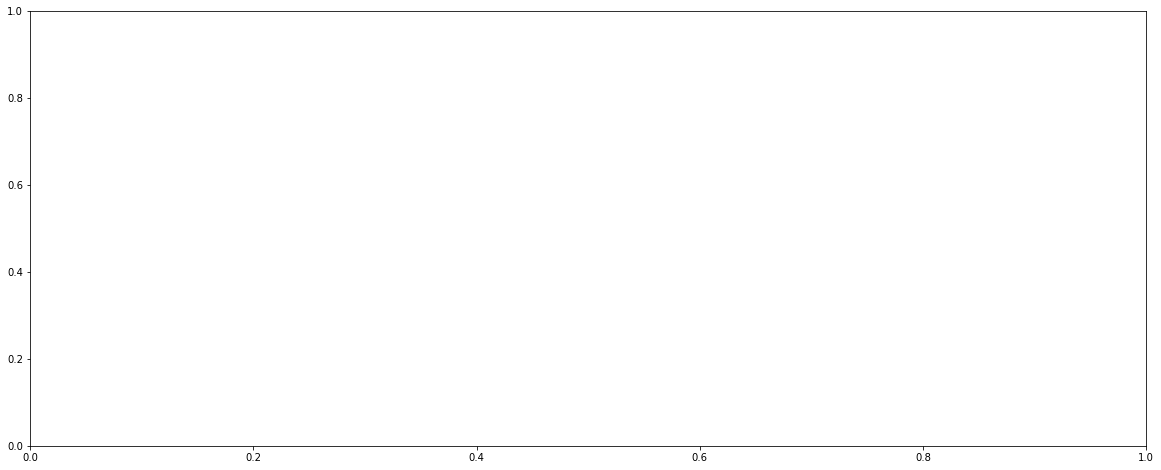

In [31]:
plt.figure(figsize=(20,8))
for mem_id in tempvar.member_id:
    data = tempvar.sel(member_id=mem_id)
    plt.plot(data.time.values, data.data)
#     tempvar.isel(member_id=0).time#.plot.line(x='time')